### Probability density functions (pdf)

- a *density function* is an histogram with infinitessimal bin-widths (i.e. the bin width tends to zero and the number of bins tends to infinite)
- the heights show the fraction of datapoints falling in each infinitessimal bin
- a *density function* can be interpreted as the probability of observing each value in the range of the variable, so it is also known as ***probability density function*** (pdf)
- we compute the *density function* by means of a ***kernel density estimation*** (KDE)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme() # Setting seaborn style

In [2]:
iris = sns.load_dataset("iris")

#### probability density function (pdf)

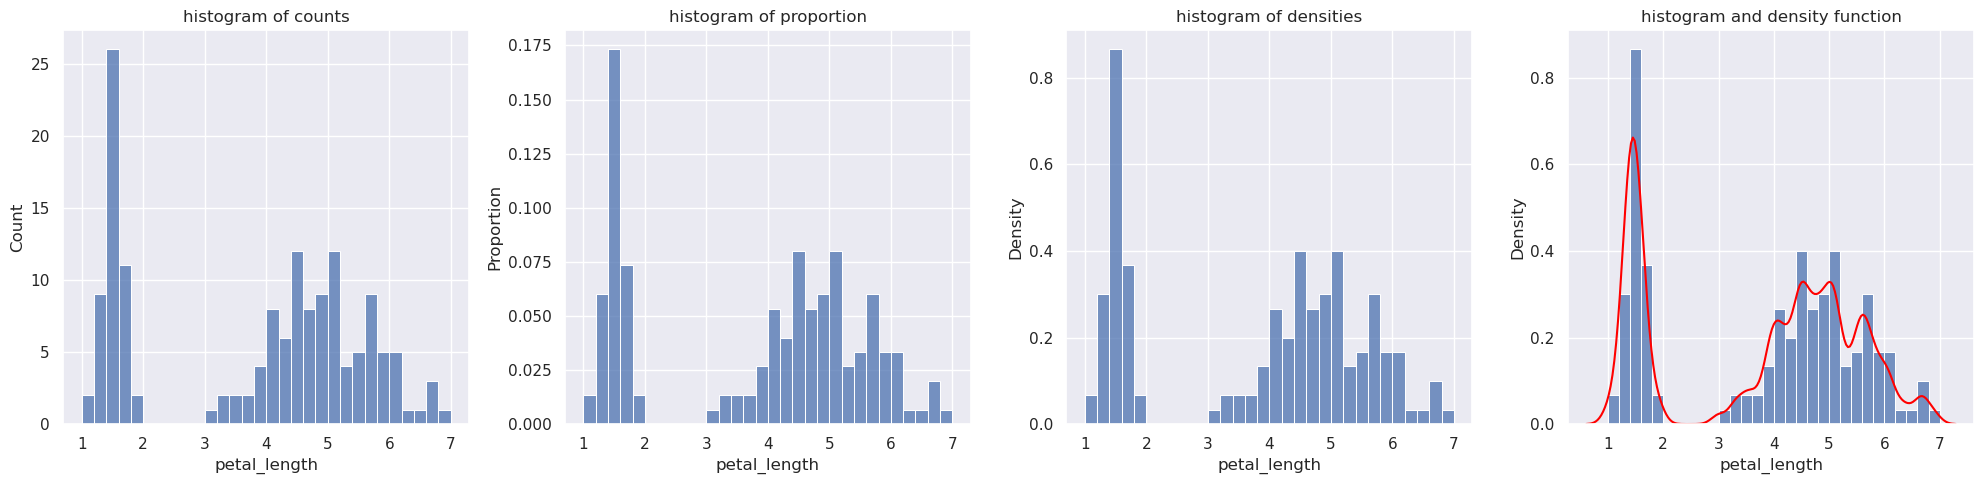

In [3]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
#
sns.histplot(ax = axs[0], data = iris, x = "petal_length", binwidth = 0.2, stat = 'count')
axs[0].set_title('histogram of counts')
#
sns.histplot(ax = axs[1], data = iris, x = "petal_length", binwidth = 0.2, stat = 'proportion')
axs[1].set_title('histogram of proportion')
#
sns.histplot(ax = axs[2], data = iris, x = "petal_length", binwidth = 0.2, stat = 'density')
axs[2].set_title('histogram of densities')
#
sns.histplot(ax = axs[3], data = iris, x = "petal_length", binwidth = 0.2, stat = 'density')
sns.kdeplot(ax = axs[3], data = iris,  x = 'petal_length', bw_adjust = 0.2, color = 'red');
axs[3].set_title('histogram and density function')
plt.tight_layout();

### Del primer al segon dividir per n, el seguent dividir per la mida del bin.
- El primer és la freqüència que en tenim, quantes unitats n'hem observat, té la limitació de que no dona informació respecte el totat. Si en tenim 8 per exemple no és el mateix que sigui respectre de 9 que de 150.
<br/>

- (dividim per nº mostres). El segon és la proporció que en tenim (representa quin % d'unitats cauen dins aquell interval). Si en teniem 8, ara farem 8/150 = 0.05 (un 5%) de les mostres cauen en aquell interval.
<br/>

- (dividim per la mida del bin) El tercer és la densitat, sería (8/150)/0.2 = 0.26, representa quan d'apretats estàn. No aporta més informació perquè tots els bins són iguals (ja és el que volem). Si fessim 8/0.2 &rarr; sería com la densitat de població (nºobservacions/persones que viuen/estan en un lloc concret &rarr; mostres que estan en un rang), però nosaltres per arribar a fer l'histogama de densitats ho hem de fer a partir de la proporció per això fem la denisitat de la proporció &rarr; 0.05/0.2
<br/>

- El quart, dividim el bin a un infinit decimal, llavors la altura representa quin % cau en aquell punt infinit decimal. També és la probabilitat d'observar aquell valor. 
<br/>

- De passar de discret a continu, generalitzem (els valors que no surten també els hi donem probabilitat)

### pdf kernel density estimation

- building a histogram is indeed a kernel density estimation using a square (*tophat*) kernel
- kernel density estimation can use different kernels to smooth the final shape of the pdf
- seaborn allows us to plot the pdf but does not return it
- if we need to compute the pdf we use the KernelDensity class from scikit-learn

In [4]:
from sklearn.neighbors import KernelDensity

#### available kernels

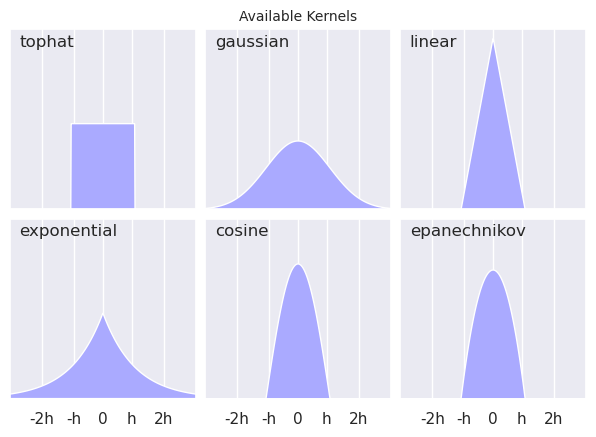

In [5]:
kernels = ["tophat", "gaussian", "linear", "exponential", "cosine", "epanechnikov"]

fig, axs = plt.subplots(2, 3, sharex = True, sharey = True)
fig.subplots_adjust(left = 0.05, right = 0.95, hspace = 0.05, wspace = 0.05)
axs[0, 1].set_title("Available Kernels", fontsize = 10);

X = np.linspace(-6, 6, 1000)[:, None]

for i, kernel in enumerate(kernels):
    axi = axs.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(np.zeros((1, 1))).score_samples(X)
    axi.fill(X[:, 0], np.exp(log_dens), "-k", fc="#AAAAFF")
    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)
    axi.set_yticks([])
    axi.set_xticks(ticks = [-1.9, -0.9, 0, 0.9, 1.9], labels = ['-2h', '-h', '0', 'h', '2h'])
    axi.text(-2.6, 0.95, kernel)

- El band width és de -h a h, com més gran és, més estem distorcionant la nostre funció final, ja que estarem "tirant" més mostres a fora. El fem més gran quan no sabem si les mostres representen bé la realitat i el fem petit quan sabem a ciència certa que les mostres representen la realitat. 
<br/>

- És fa servir per suabitzar la funció, si ho fessim amb la forma de l'histograma seríen línies. Es fa servir aquest mètode per trobar una funció que no tingui punts crítics (que no tingui puntes amb derivades 0, etc). 

#### pdf computation using sklearn

In [6]:
# create instance of KernelDensity() class
# the bandwidth parameter sets the width of the kernel
kde = KernelDensity(kernel = 'gaussian', bandwidth = 0.1)
kde

KernelDensity(bandwidth=0.1)

In [7]:
# reshape data from row vector
np.array(iris.petal_length).shape, np.array(iris.petal_length)[:5]

((150,), array([1.4, 1.4, 1.3, 1.5, 1.4]))

In [8]:
# to column vector
np.array(iris.petal_length)[:, None].shape, np.array(iris.petal_length)[:5, None]

((150, 1),
 array([[1.4],
        [1.4],
        [1.3],
        [1.5],
        [1.4]]))

In [9]:
# fit data (columns vector) to the KernelDensity() instance
kde.fit(np.array(iris.petal_length)[:, None])

KernelDensity(bandwidth=0.1)

In [10]:
# exemple
new_value = np.random.rand() *(iris.petal_length.max() - iris.petal_length.min())
log_density = kde.score_samples([[new_value]]).item()
density = np.exp(log_density).item()
(new_value, log_density, density)

(4.278711312017915, -1.5193622228649297, 0.21885142088392684)

#### seaborn pdf compared to sklearn pdf

In [11]:
# define binning
bin_width = 0.02
kde_bins = np.round(np.arange(iris['petal_length'].min() -0.4, iris['petal_length'].max() +0.4, step = bin_width), 2)
kde_bins[:5], kde_bins[-5:]

(array([0.6 , 0.62, 0.64, 0.66, 0.68]), array([7.22, 7.24, 7.26, 7.28, 7.3 ]))

In [12]:
# compute densities for each bin (compute the pdf)
kde_pdf = np.exp(kde.score_samples(kde_bins[:, None]))
kde_pdf[:5], kde_pdf[-5:]

(array([9.02194407e-06, 1.97298684e-05, 4.14778271e-05, 8.38357787e-05,
        1.62941071e-04]),
 array([1.59010813e-04, 8.21727433e-05, 4.08017147e-05, 1.94657672e-05,
        8.92282578e-06]))

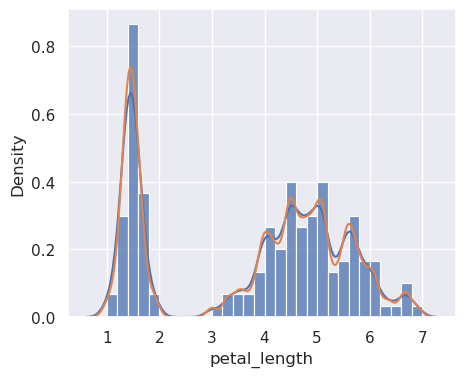

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(5, 4))
# seaborn density histogram
sns.histplot(ax = axs, data = iris, x = "petal_length", binwidth = 0.2, stat = 'density')
# seaborn pdf
sns.kdeplot(ax = axs, data = iris,  x = 'petal_length', bw_adjust = 0.2)
# sklearn pdf
sns.lineplot(ax = axs, x = kde_bins, y = kde_pdf);